In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yelp_df = pd.read_csv('yelp_labelled.txt', delimiter='\t',  header=None)

In [3]:
yelp_df.columns = ['message','score']

In [4]:
yelp_df

,message,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [5]:
# keywords = ['rude','bad','never','not','worst','avoid', 'poor', "wasn't", 'disappointing','disappointed','terrible']
keywords = ['fantastic','perfect','fast','tasty','best','awesome','amazing','great', 'good', 'friendly', 'love', 'authentic', 'delicious', 'wonderful','nice', 'recommend']
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_df[str(key)] = yelp_df.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [6]:
yelp_df.head()

,message,score,fantastic,perfect,fast,tasty,best,awesome,amazing,great,good,friendly,love,authentic,delicious,wonderful,nice,recommend
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


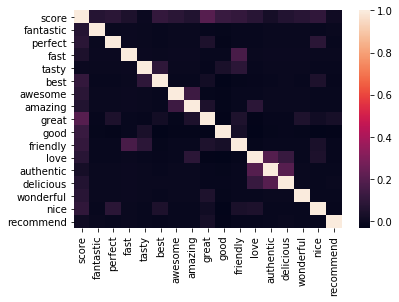

In [7]:
sns.heatmap(yelp_df.corr())

In [8]:
data = yelp_df[keywords]
target = yelp_df['score']

In [9]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 365


In [10]:
print("Accuracy is {}%".format(100 - ((target != y_pred).sum()/data.shape[0]) * 100))

Accuracy is 63.5%


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[475,  25],
       [340, 160]])

In [12]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.655
Testing on Sample: 0.635


These scores look really consistent! It doesn't seem like our model is overfitting. Part of the reason for that is that it's so simple (more on that in a bit). But we should look and see if any other issues are lurking here. So let's try a more robust evaluation technique, cross validation.

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.6 , 0.66, 0.63, 0.61, 0.62, 0.59, 0.69, 0.64, 0.62, 0.68])

__Do any of your classifiers seem to overfit?__ No, because every validation has a similar range of scores.

__Which seem to perform the best? Why?__ No, accuracy is just 63.5%. we need better accuracy.

__Which features seemed to be most impactful to performance?__ Keywords